In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [2]:
df = pd.read_csv("IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df["species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [4]:
df.shape

(150, 5)

## DATA CLEANING

In [34]:
# check for missing values

df.isnull().sum() # hence no missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# we check for dupes
df.duplicated().sum()

np.int64(3)

In [7]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
df = df.drop_duplicates() # removing dupes

In [9]:
df.shape

(147, 5)

<Axes: xlabel='species', ylabel='Count'>

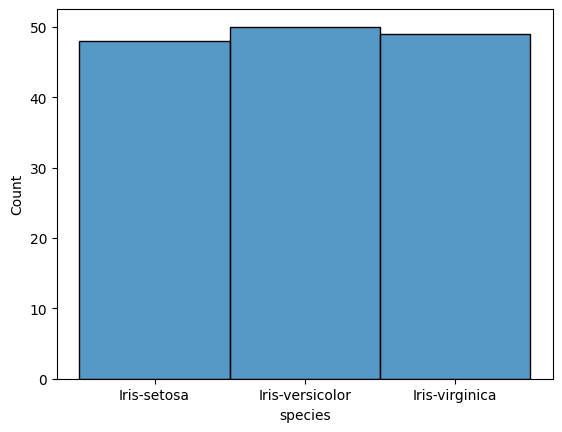

In [10]:
# lets visualize our dataset first

sns.histplot(df["species"])

In [11]:
# lets create some scatter plots to understand our data a bit better
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

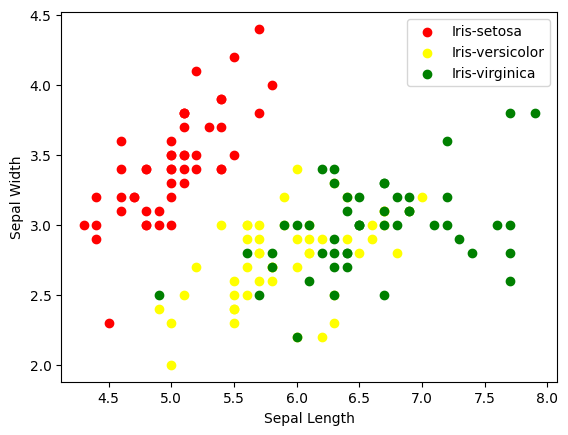

In [12]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()
plt.show()

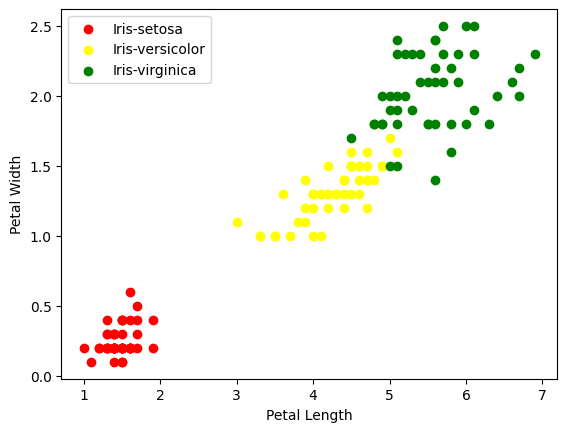

In [28]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["petal_length"], x["petal_width"], c = colors[i], label = species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.legend()
plt.show()

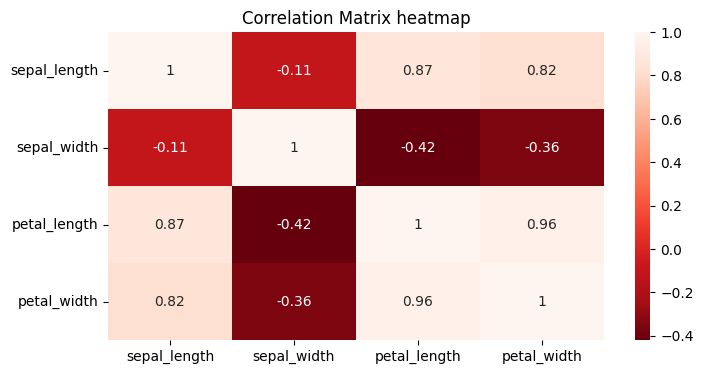

In [33]:
# heatmap

data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix heatmap')
plt.show()

## FEATURE ENGINEERING

In [47]:
# we do categorical encoding

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

unique_species = df['species'].unique()
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [50]:
# Defining the X and y
x=df.drop(columns=['species'], axis=1)
y=df['species']

In [51]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

## ML Model Implementation

In [52]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score
     

In [53]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

# ML Model - 1 : Logistic regression


Confusion Matrix:


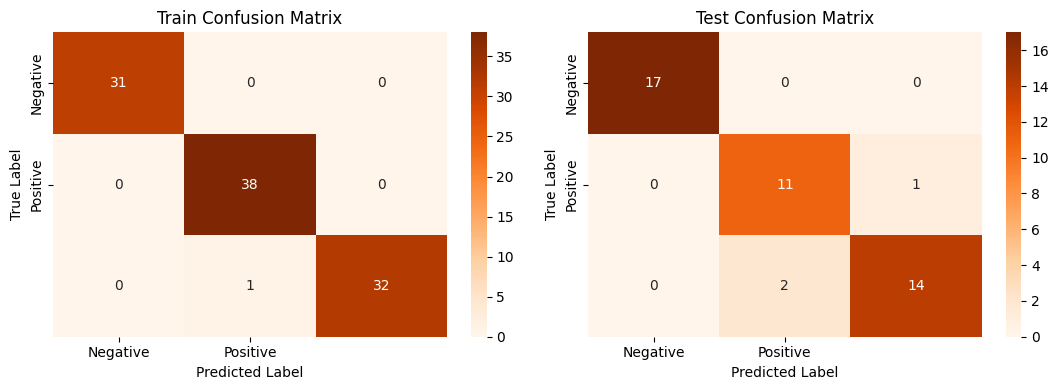


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  31        |
| 1            |    0.974359 | 1        |   0.987013 |  38        |
| 2            |    1        | 0.969697 |   0.984615 |  33        |
| accuracy     |    0.990196 | 0.990196 |   0.990196 |   0.990196 |
| macro avg    |    0.991453 | 0.989899 |   0.990543 | 102        |
| weighted avg |    0.990447 | 0.990196 |   0.990184 | 102        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.846154 | 0.916667 |   0.88     | 12        |
| 2            |    0.933333 | 0.875    |   0.903226 | 16        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.9333

In [56]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [57]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.990447
Precision Test,0.935271
Recall Train,0.990196
Recall Test,0.933333
Accuracy Train,0.990196
Accuracy Test,0.933333
F1 macro Train,0.990184
F1 macro Test,0.933591


# ML Model - 2 : Decision Tree


Confusion Matrix:


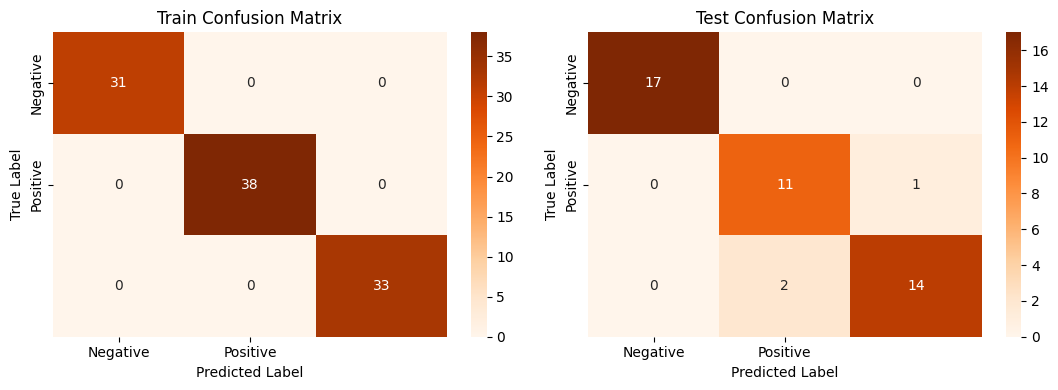


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        38 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.846154 | 0.916667 |   0.88     | 12        |
| 2            |    0.933333 | 0.875    |   0.903226 | 16        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [58]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [59]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Decision Tree
Precision Train,0.990447,1.000000
Precision Test,0.935271,0.935271
Recall Train,0.990196,1.000000
Recall Test,0.933333,0.933333
Accuracy Train,0.990196,1.000000
Accuracy Test,0.933333,0.933333
F1 macro Train,0.990184,1.000000
F1 macro Test,0.933591,0.933591


# ML Model - 3 : Random Forest


Confusion Matrix:


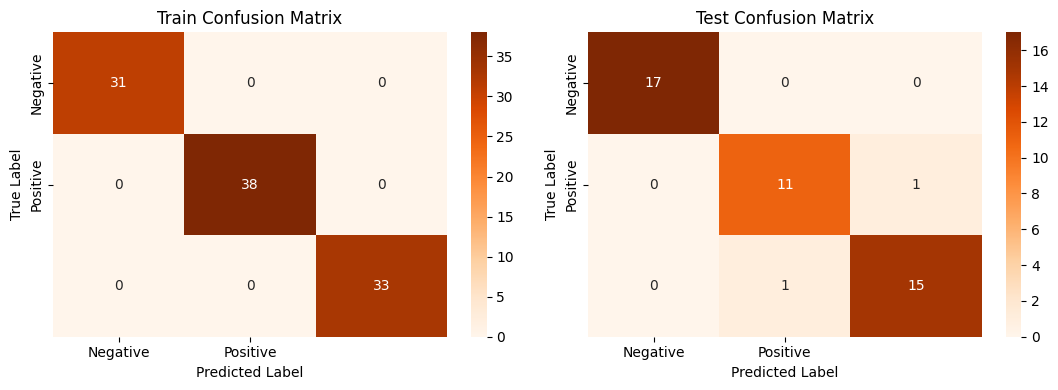


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        38 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.916667 | 0.916667 |   0.916667 | 12        |
| 2            |    0.9375   | 0.9375   |   0.9375   | 16        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [60]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [61]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Decision Tree,Random Forest
Precision Train,0.990447,1.000000,1.000000
Precision Test,0.935271,0.935271,0.955556
Recall Train,0.990196,1.000000,1.000000
Recall Test,0.933333,0.933333,0.955556
Accuracy Train,0.990196,1.000000,1.000000
Accuracy Test,0.933333,0.933333,0.955556
F1 macro Train,0.990184,1.000000,1.000000
F1 macro Test,0.933591,0.933591,0.955556


# ML Model - 4 : SVM (Support Vector Machine)


Confusion Matrix:


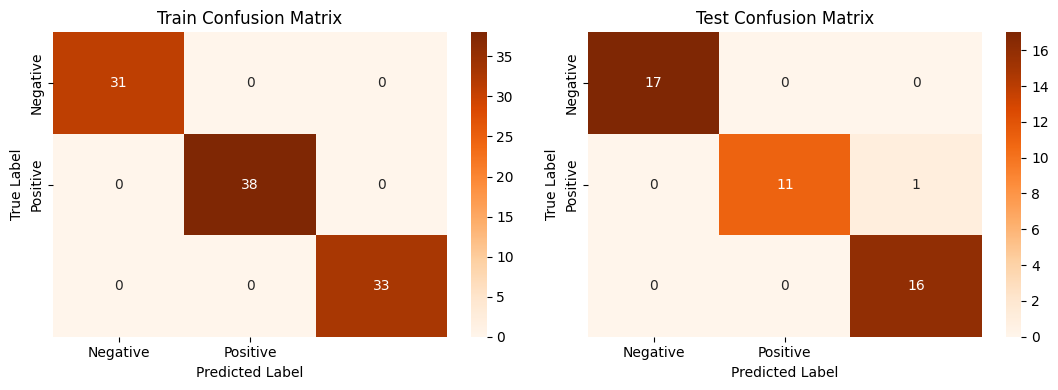


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        38 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.916667 |   0.956522 | 12        |
| 2            |    0.941176 | 1        |   0.969697 | 16        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [62]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [63]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Decision Tree,Random Forest,SVM
Precision Train,0.990447,1.000000,1.000000,1.000000
Precision Test,0.935271,0.935271,0.955556,0.979085
Recall Train,0.990196,1.000000,1.000000,1.000000
Recall Test,0.933333,0.933333,0.955556,0.977778
Accuracy Train,0.990196,1.000000,1.000000,1.000000
Accuracy Test,0.933333,0.933333,0.955556,0.977778
F1 macro Train,0.990184,1.000000,1.000000,1.000000
F1 macro Test,0.933591,0.933591,0.955556,0.977631


# ML Model - 5 : Xtreme Gradient Boosting


Confusion Matrix:


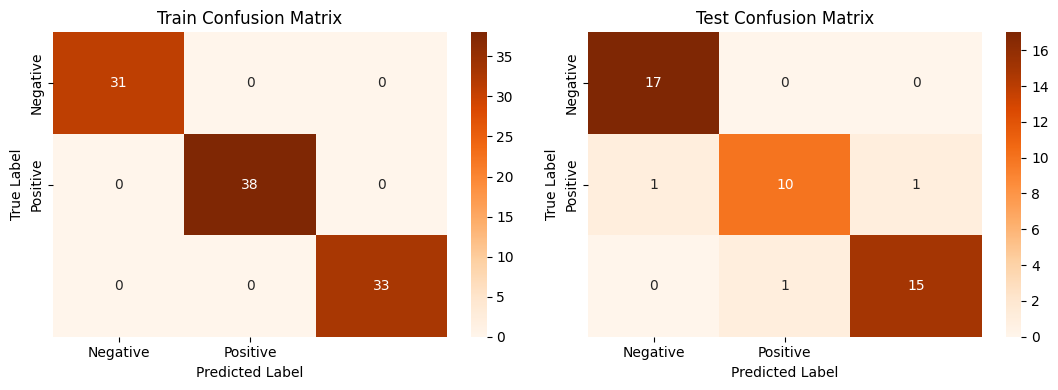


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        31 |
| 1            |           1 |        1 |          1 |        38 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       102 |
| weighted avg |           1 |        1 |          1 |       102 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.944444 | 1        |   0.971429 | 17        |
| 1            |    0.909091 | 0.833333 |   0.869565 | 12        |
| 2            |    0.9375   | 0.9375   |   0.9375   | 16        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [64]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [65]:
# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic regression,Decision Tree,Random Forest,SVM,XGB
Precision Train,0.990447,1.000000,1.000000,1.000000,1.000000
Precision Test,0.935271,0.935271,0.955556,0.979085,0.932548
Recall Train,0.990196,1.000000,1.000000,1.000000,1.000000
Recall Test,0.933333,0.933333,0.955556,0.977778,0.933333
Accuracy Train,0.990196,1.000000,1.000000,1.000000,1.000000
Accuracy Test,0.933333,0.933333,0.955556,0.977778,0.933333
F1 macro Train,0.990184,1.000000,1.000000,1.000000,1.000000
F1 macro Test,0.933591,0.933591,0.955556,0.977631,0.932202
